In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate
from matplotlib import rc 
import os.path as path
import wget

In [2]:
#__________________________________Ejercicio__1.2__________________________________#

In [3]:
def f1(t):
    return t

In [24]:
def GetFourier(t,T,N):

    a0, error0 = integrate.quad( lambda t: f1(t), -0.5*T , 0.5*T )
    a0 *= 2./T
    y = a0
    
    for n in range(1,N):
        an, erroran = integrate.quad( lambda t: f1(t)*np.cos( (n*t) ), -0.5*T , 0.5*T )
        bn, errorbn = integrate.quad( lambda t: f1(t)*np.sin( (n*t) ), -0.5*T , 0.5*T )
        y += 2.*an*np.cos(n*t )/T + 2.*bn*np.sin(n*t)/T 
    return y



<IPython.core.display.Javascript object>


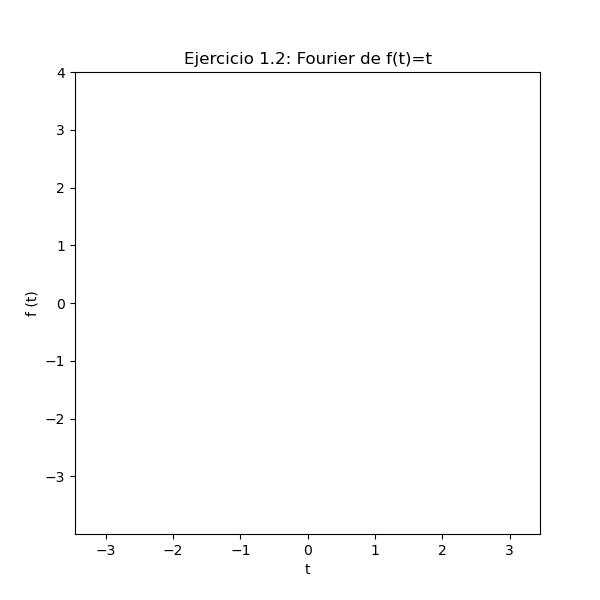

In [32]:
t = np.arange(-np.pi,np.pi,0.01)
i=2
fig2 = plt.figure(figsize=(6,6))
plt.title("Ejercicio 1.2: Fourier de f(t)=t")
plt.xlabel("t")
plt.ylabel("f (t)")

camera1 = Camera(fig2)
y1=t

while i <50:
    y = GetFourier(t,2*np.pi,i)
    plt.plot(t,y1,color="black")
    plt.plot(t,y,color="blue")
    camera1.snap()
    i+=1
animation = camera1.animate()
animation.save('Ejercicio_1_2.mp4')

In [ ]:
#__________________________________Ejercicio__1.3__________________________________#

In [37]:
j=2
zita=1
zita_sol_analitica=(np.pi**6)/945
while j<1000:
    zita+=1/(j**6)
    j+=1
print(zita) 
print(zita_sol_analitica)

1.017343061984441
1.017343061984449


In [40]:
#__________________________________Ejercicio__1.1 y 1.5__________________________________#

In [41]:
data = np.loadtxt("ManchasSolares.txt")



#FIltrar datos


a=data[:,0]
valor=len(a)

lista=np.array([1,2,3])
g=lista[lista[1]]

Años = a[a>=1900]
valor1=len(Años)
pat=valor-valor1
M= data[:,1]
Meses=M[pat:valor]
Man= data[:,3]
Manch=Man[pat:valor]
v_medio= np.mean(Manch)
Manchas=Manch-v_medio

Datos= Años + (Meses*0.083)


plt.plot(Datos,Manch, label="Datos")
fftmanchas=np.fft.fft(Manchas)
plt.legend()
PuntosT=len(Manchas)


Frecuencias = np.fft.fftfreq(PuntosT,1)
ffta=np.abs(fftmanchas)




#mascara


valores0 = Frecuencias <0
fftmanchas[valores0] = 0

ii = np.argmax(np.abs(fftmanchas))
Valor=fftmanchas[ii]
fftmanchas[fftmanchas!=Valor]=0
print(Frecuencias[ii])


#Periodo pasando de paso discreto a meses 96 años medidos
Periodo=(Frecuencias[ii]/96)*len(Manchas)
Tiempo=1/Periodo
plt.title("Periodo "+str(round(Tiempo,1))+" en años")
NewSample = np.fft.ifft(2*fftmanchas)
Muestra_Real=NewSample+v_medio
plt.plot(Datos,Muestra_Real, label="Frecuencia Dominante")
plt.legend()
plt.xlabel("Frecuencia [1/mes]")
plt.ylabel("Normal FFT")

plt.show()
plt.savefig("TransformadafourierJoanFaber.png")


OSError: ManchasSolares.txt not found.